In [1]:
from IPython.core.display import set_matplotlib_formats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
startup = pd.read_csv('50_Startups.csv')
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
startup1 = startup.rename({'R&D Spend':'RDS','Administration' :'ADM','Marketing Spend':'MRKS'},axis=1)
startup1

,RDS,ADM,MRKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
startup2= startup1.drop(['State'],axis=1)
startup2

,RDS,ADM,MRKS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [7]:
startup2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RDS     50 non-null     float64
 1   ADM     50 non-null     float64
 2   MRKS    50 non-null     float64
 3   Profit  50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [8]:
startup2.describe()

,RDS,ADM,MRKS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
startup2.corr()

,RDS,ADM,MRKS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MRKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


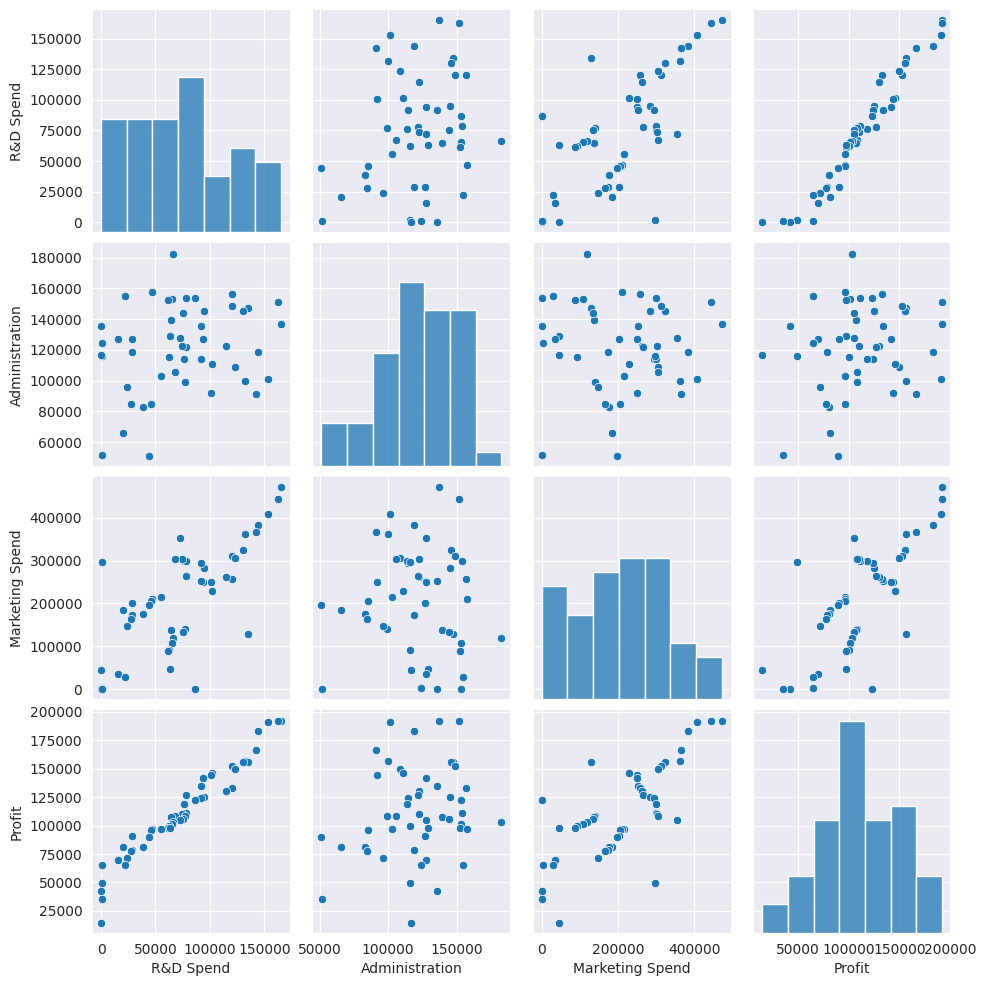

In [10]:
sn.set_style(style = 'darkgrid')
sn.pairplot(startup)

In [11]:
model= smf.ols('Profit ~ RDS+ADM+MRKS',data=startup2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           4.53e-30
Time:                        05:45:28   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADM           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MRKS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model.params
model.pvalues ,model.tvalues

(Intercept    1.057379e-09
 RDS          2.634968e-22
 ADM          6.017551e-01
 MRKS         1.047168e-01
 dtype: float64,
 Intercept     7.626218
 RDS          17.846374
 ADM          -0.525507
 MRKS          1.655077
 dtype: float64)

In [13]:
mdl_adm = smf.ols('Profit~ ADM',data=startup2).fit()
mdl_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 10 Jan 2024   Prob (F-statistic):              0.162
Time:                        05:45:28   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADM            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
mdl_mrk = smf.ols('Profit~ MRKS',data=startup2).fit()
mdl_mrk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           4.38e-10
Time:                        05:45:28   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MRKS           0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
mdl_adm_mrk = smf.ols('Profit~ ADM+MRKS',data=startup2).fit()
mdl_adm_mrk.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           2.50e-10
Time:                        05:45:28   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADM            0.3237      0.131      2.468      0.017       0.060       0.588
MRKS           0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
rsqrt_rds = smf.ols('RDS ~ ADM+MRKS',data=startup2).fit().rsquared
vif_rd = 1/(1-rsqrt_rds)
vif_rd

2.4689030699947017

In [17]:
rsqrt_admin = smf.ols('ADM ~ RDS+MRKS',data=startup2).fit().rsquared
vif_admin = 1/(1-rsqrt_admin)
vif_admin

1.1750910070550453

In [18]:
rsqrt_market = smf.ols('MRKS ~ RDS+ADM',data=startup2).fit().rsquared
vif_market = 1/(1-rsqrt_market)
vif_market

2.326773290530878

In [19]:
data = {'variables':['RDS','ADM','MRKS'],'vif':[vif_rd,vif_admin,vif_market]}
vif_table = pd.DataFrame(data)
vif_table

,variables,vif
0,RDS,2.468903
1,ADM,1.175091
2,MRKS,2.326773


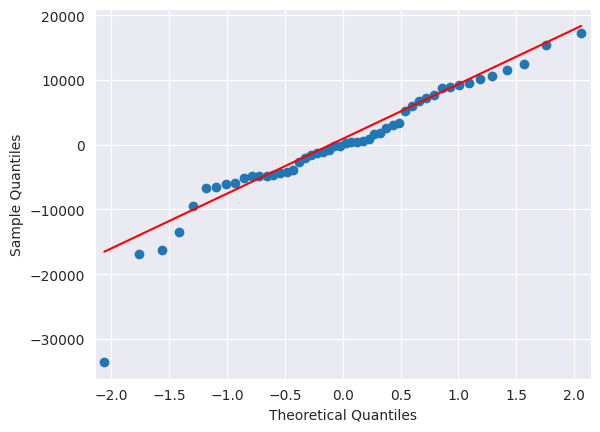

In [20]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')

In [21]:
list(np.where(model.resid<-30000))

[array([49])]

In [22]:
def get_standardized_values(vals):
  return (vals-vals.mean())/(vals.std())

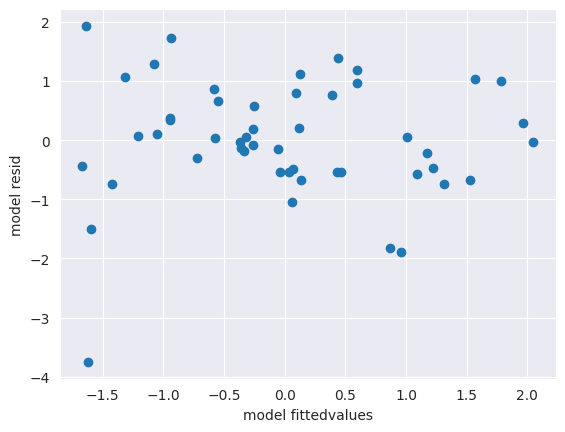

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.xlabel('model fittedvalues')
plt.ylabel('model resid')
plt.show()

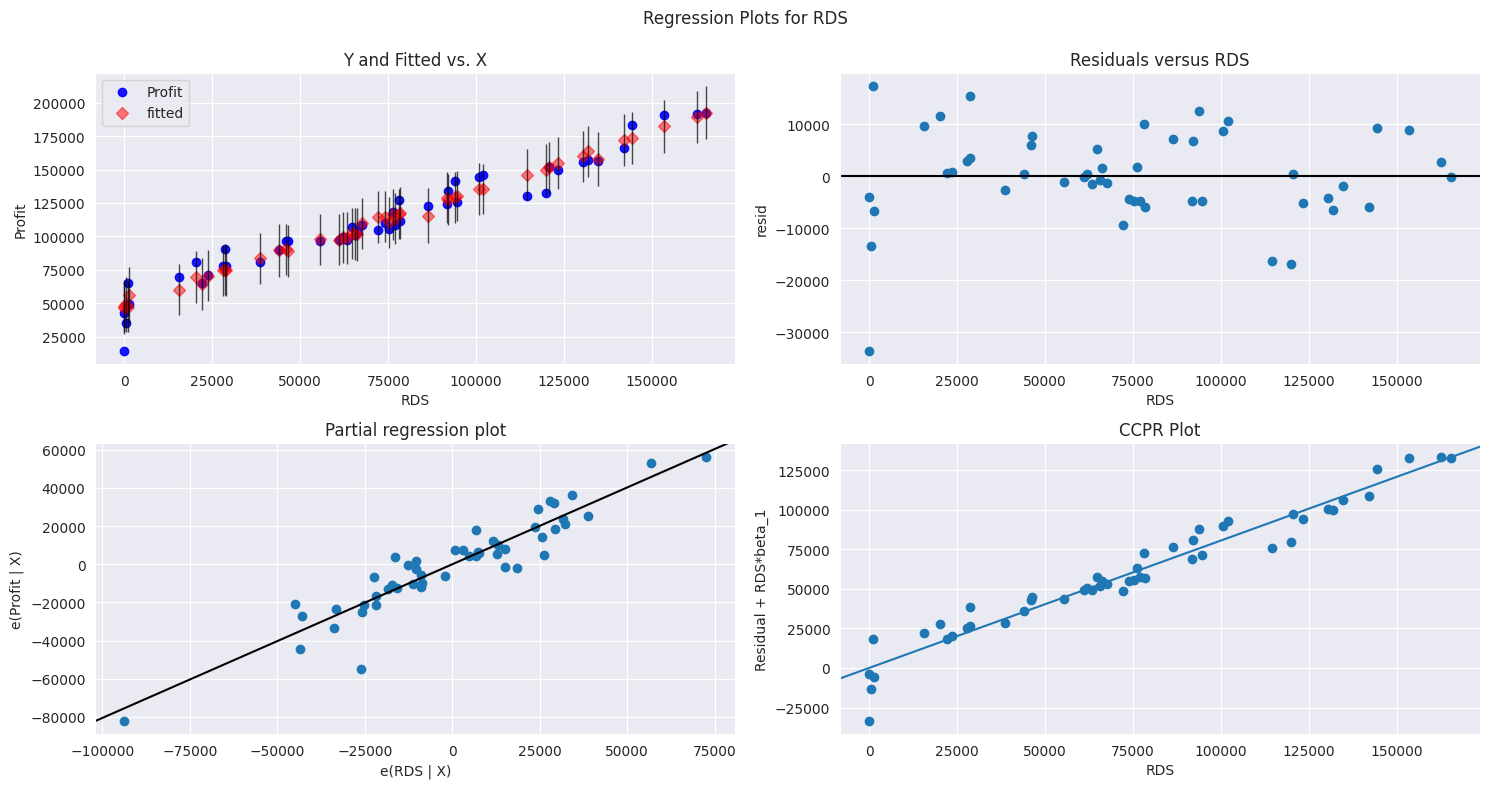

In [24]:

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

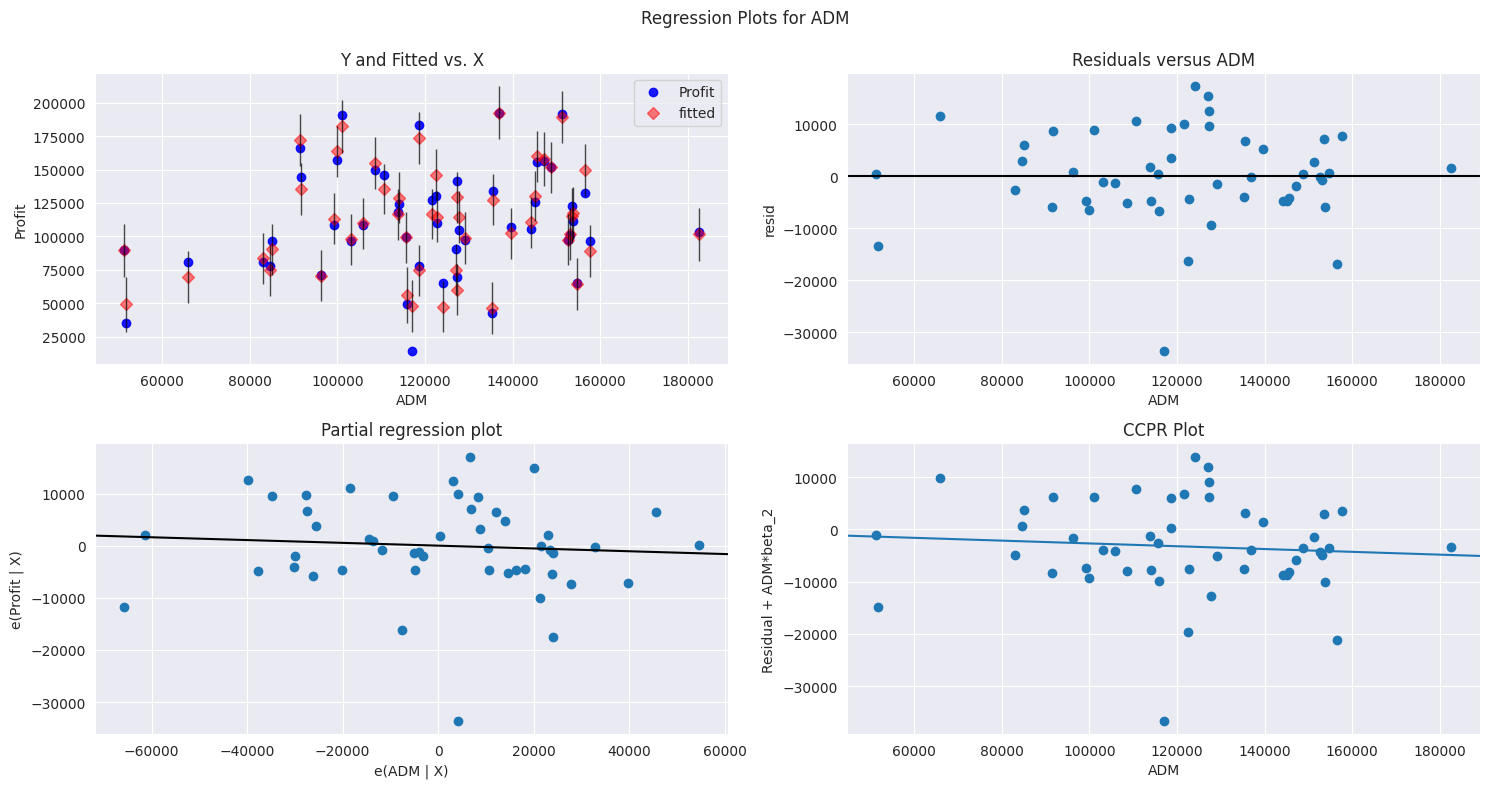

In [25]:

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADM", fig=fig)
plt.show()

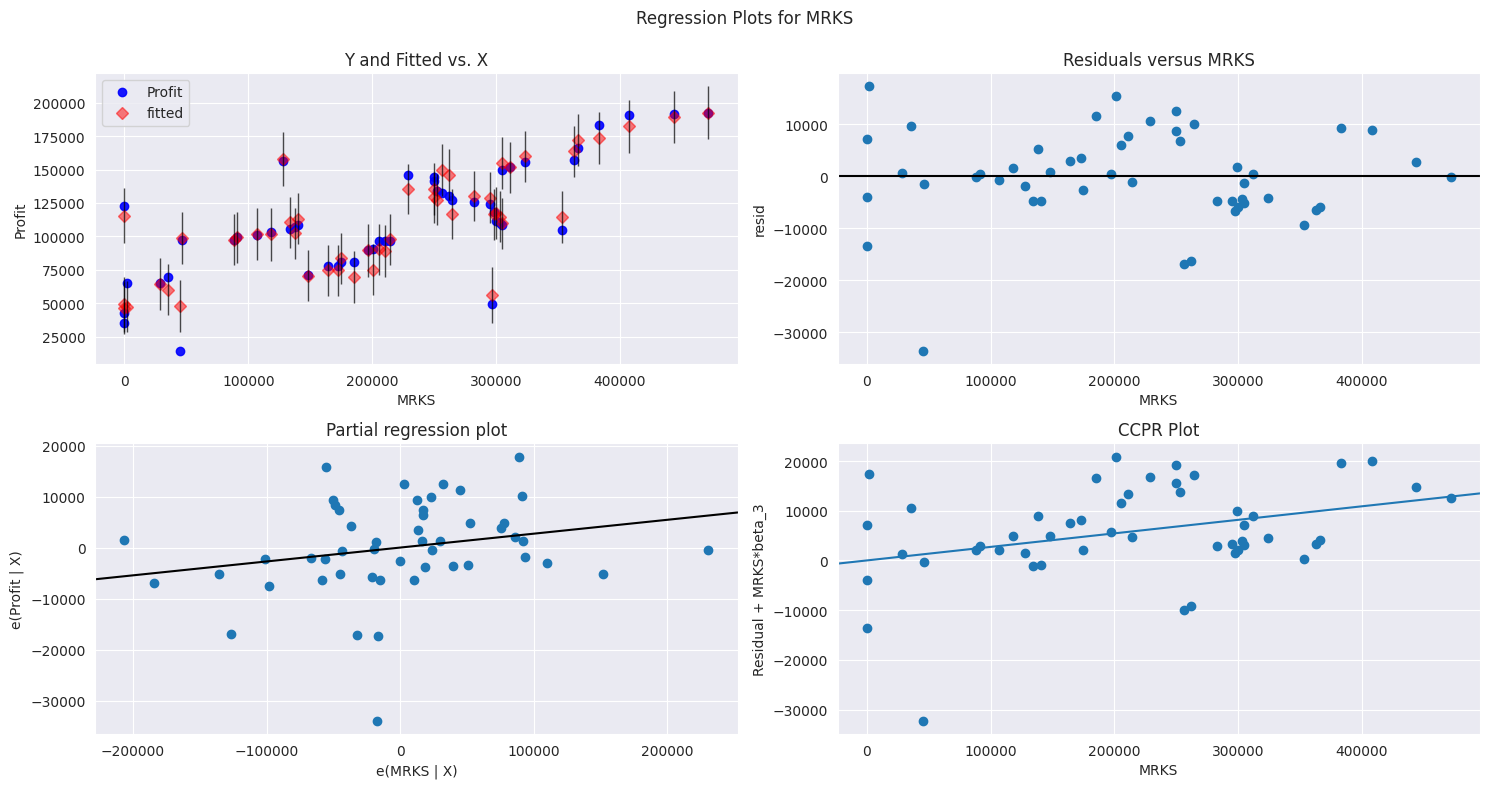

In [26]:

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MRKS", fig=fig)
plt.show()

<StemContainer object of 3 artists>

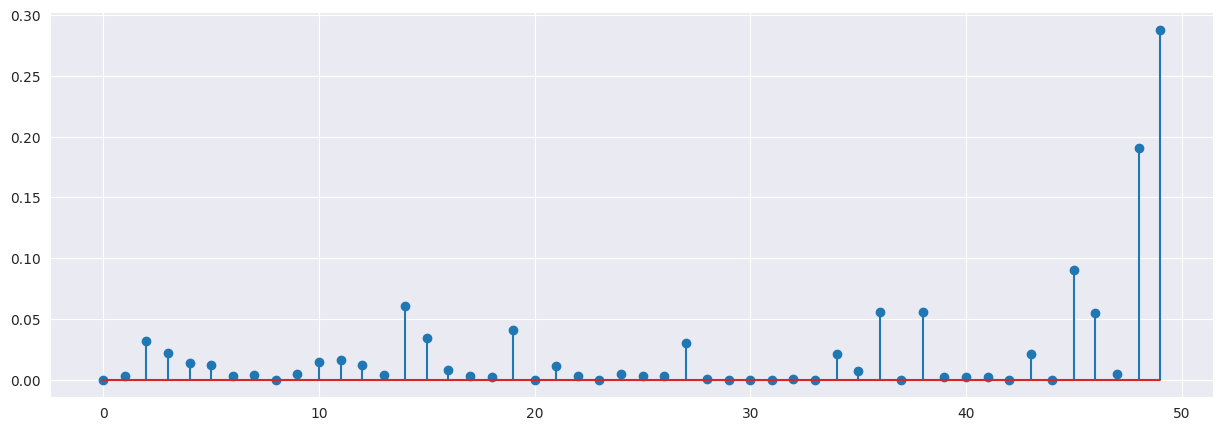

In [27]:
model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance
fig = plt.subplots(figsize=(15,5))
plt.stem(np.arange(len(startup)),np.around(c,3))

In [28]:
np.argmax(c),np.max(c)

(49, 0.2880822927543272)

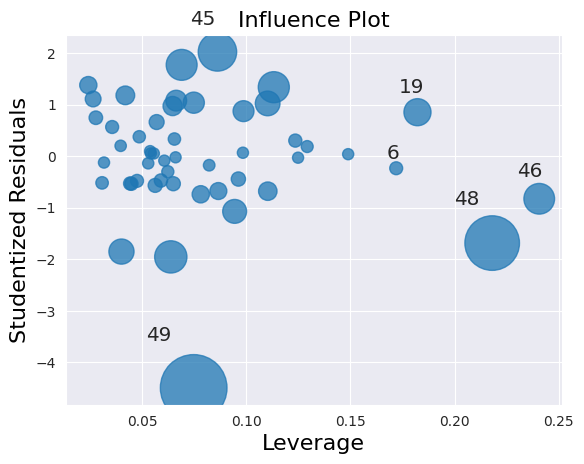

In [29]:
influence_plot(model)
plt.show()

In [30]:
k=startup.shape[1]
n=startup.shape[0]
leverage_cutoff =(3*(k+1))/n
leverage_cutoff

0.36

In [31]:
startup[startup.index.isin([49])]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [32]:
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [33]:
strtup=startup.drop([49],axis=0)
strtup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [34]:
strtup1 = strtup.rename({'R&D Spend':'RDS','Administration' :'ADM','Marketing Spend':'MRKS'},axis=1)
strtup1

,RDS,ADM,MRKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [35]:
final_mdl_rds= smf.ols('Profit~ RDS+MRKS',data=strtup1).fit()
final_mdl_rds.summary()
final_mdl_rds.bic,final_mdl_rds.aic

(1024.5319410531658, 1018.8564801588338)

In [36]:
final_mdl_adm= smf.ols('Profit~ ADM+MRKS',data=strtup1).fit()
final_mdl_adm.summary()
final_mdl_adm.bic,final_mdl_adm.aic

(1138.5686870493832, 1132.8932261550513)

In [37]:
model_influence_rds= final_mdl_rds.get_influence()
(c_r,_)=model_influence_rds.cooks_distance

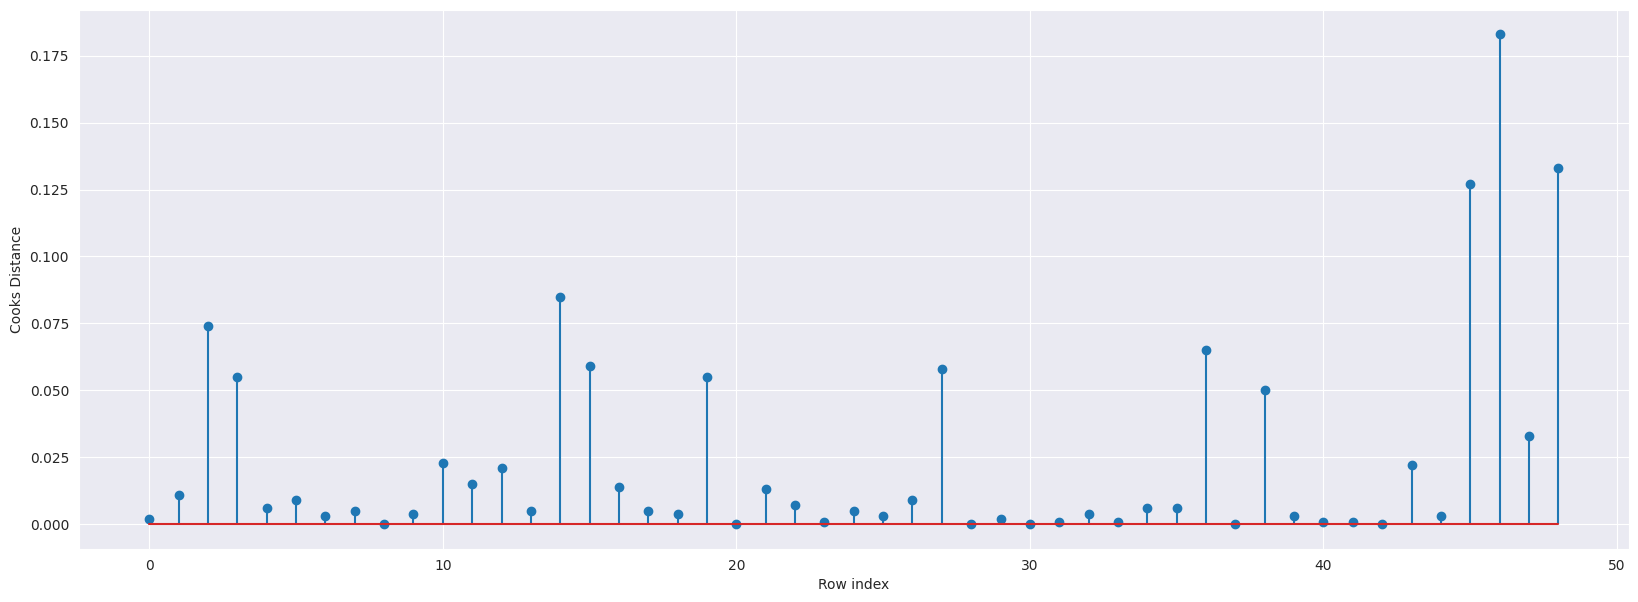

In [38]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_r,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [39]:
np.argmax(c_r),np.max(c_r)

(46, 0.18337556491338694)

In [40]:
strtup2 = strtup1.drop(strtup1.index[46],axis=0).reset_index()
strtup2

,index,RDS,ADM,MRKS,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [41]:
strtup3 = strtup2.drop(['index'],axis=1)
strtup3

,RDS,ADM,MRKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [42]:
final_mdl_rds= smf.ols('Profit~ RDS+MRKS',data=strtup3).fit()
final_mdl_rds.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     544.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           2.94e-32
Time:                        05:45:38   Log-Likelihood:                -495.55
No. Observations:                  48   AIC:                             997.1
Df Residuals:                      45   BIC:                             1003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.017e+04   2333.087     21.505      0.000    4.55e+04    5.49e+04
RDS            0.7512      0.039     19.431      0.000       0.673       0.829
MRKS           0.0353      0.014      2.511      0.016       0.007       0.064
==============================================================================
Omnibus:                        0.134   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.313
Skew:                          -0.091   Prob(JB):                        0.855
Kurtosis:                       2.649   Cond. No.                     5.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
final_model_rds = final_mdl_rds.get_influence()
(c_r,_)= final_model_rds.cooks_distance

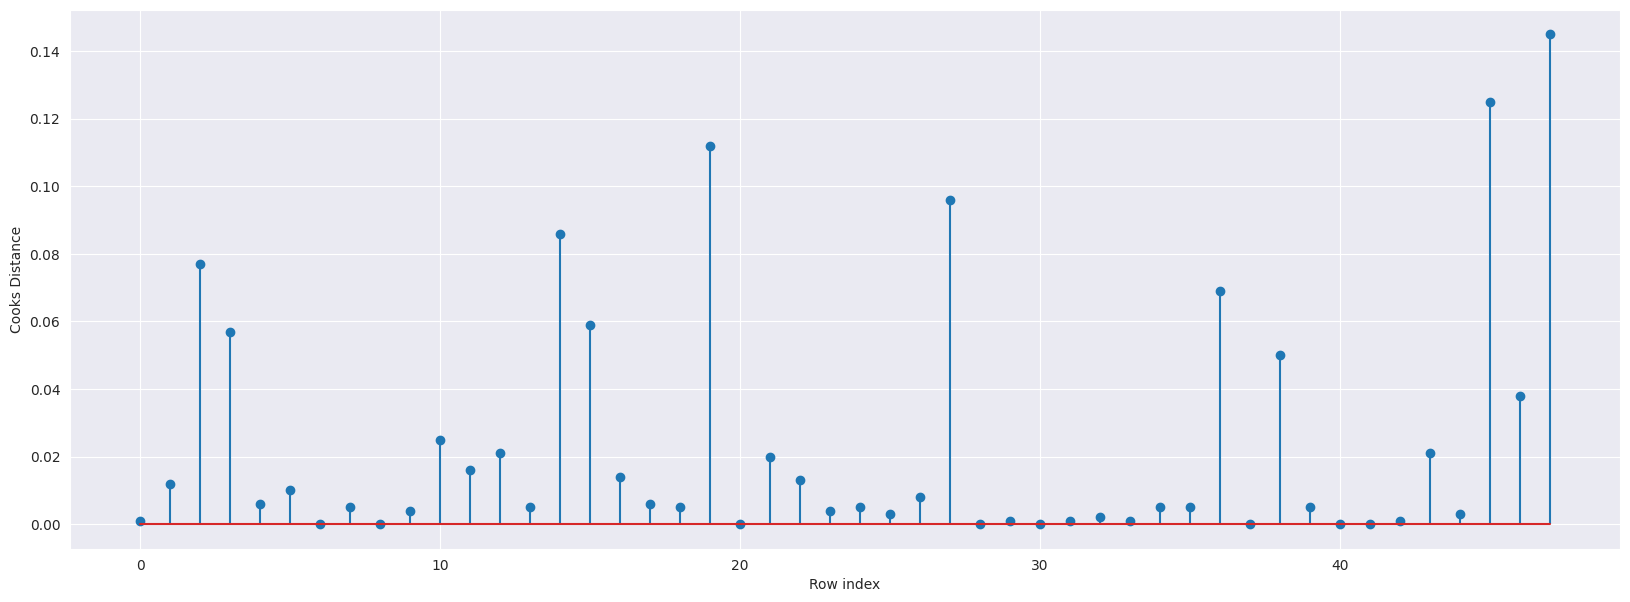

In [44]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_r,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [45]:
np.argmax(c_r),np.max(c_r)

(47, 0.14544403432423758)

In [46]:
final_model=final_mdl_rds
final_model.rsquared,final_model.aic

(0.9603203117008039, 997.1027715983952)

In [47]:
data1 = pd.DataFrame({"RDS":70000,"ADM":90000,"MRKS":140000},index=[0])

pred = final_model.predict(data1)
pred

0    107696.517568
dtype: float64

In [48]:
pred_profit = final_model.predict(strtup3)
pred_profit

0     191028.251047
1     187977.734719
2     179830.836647
3     172145.393688
4     169843.118321
5     162040.951129
6     155805.138799
7     159479.992453
8     151718.663406
9     153582.513356
10    134815.502976
11    134609.069122
12    129497.804546
13    128191.610943
14    149325.166518
15    145439.342175
16    118101.765857
17    131248.348285
18    129499.132977
19    115094.127903
20    117990.493645
21    119632.689376
22    116457.379523
23    111653.953439
24    113008.544071
25    103616.570501
26    111489.943340
27    116798.451146
28    103959.580378
29    103236.199622
30     99958.922316
31     99211.545103
32     99432.770999
33     99431.206044
34     92483.707404
35     91987.940930
36     78798.845834
37     90228.109967
38     71903.330859
39     85310.723035
40     77867.696153
41     76926.962409
42     73151.836545
43     63073.824748
44     67832.204919
45     50990.609240
46     50172.046515
47     50579.257073
dtype: float64